In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy              as np
import plotly.express       as px
import pydotplus         as pdp
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics          import mean_absolute_error, mean_squared_error
from IPython.display         import Image
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics          import accuracy_score, confusion_matrix
from sklearn.metrics          import auc,roc_curve
from sklearn.metrics          import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV


### LOADING DATASET

In [2]:
df3 = pd.read_csv('./data/paris_weekdays.csv')
df4 = pd.read_csv('./data/paris_weekends.csv')

In [3]:
df3['weekends'] = 0
df4['weekends'] = 1

In [4]:
d = [df3, df4]
df = pd.concat(d, axis= 0)
df = df.rename(columns= {df.columns[0]: 'ID'})
df.drop(['ID', 'attr_index_norm', 'rest_index_norm'], axis=1, inplace=True)
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,weekends
0,296.159940,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193709,518.478947,1218.662228,2.35385,48.86282,0
1,288.237487,Private room,False,True,2.0,True,0,0,10.0,97.0,1,2.100005,0.107221,873.216962,1000.543327,2.32436,48.85902,0
2,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302325,0.234724,444.556077,902.854467,2.31714,48.87475,0
3,298.956100,Entire home/apt,False,False,2.0,False,0,1,9.0,91.0,1,0.547567,0.195997,542.142014,1199.184166,2.35600,48.86100,0
4,247.926181,Entire home/apt,False,False,4.0,False,0,0,7.0,82.0,1,1.197921,0.103573,406.928958,1070.775497,2.35915,48.86648,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,80.0,1,3.660389,0.168146,209.752453,540.326583,2.38051,48.88393,1
3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558813,0.154703,185.486701,474.351813,2.40050,48.85093,1
3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205205,0.253029,172.658919,406.585935,2.40100,48.87700,1
3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891214,0.240674,235.167925,602.451672,2.38200,48.87400,1


In [5]:
df.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
rest_index                    0
lng                           0
lat                           0
weekends                      0
dtype: int64

### EDA


In [6]:
continuous_cols = ['realSum', 'guest_satisfaction_overall', 
                 'dist','metro_dist', 'attr_index','rest_index', 'lng', 'lat']
discrete_cols = ['person_capacity', 'cleanliness_rating', 'bedrooms' ]
binary_cols = ['room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz', 'weekends']
nominal_cols = ['room_type']

#### Distribution

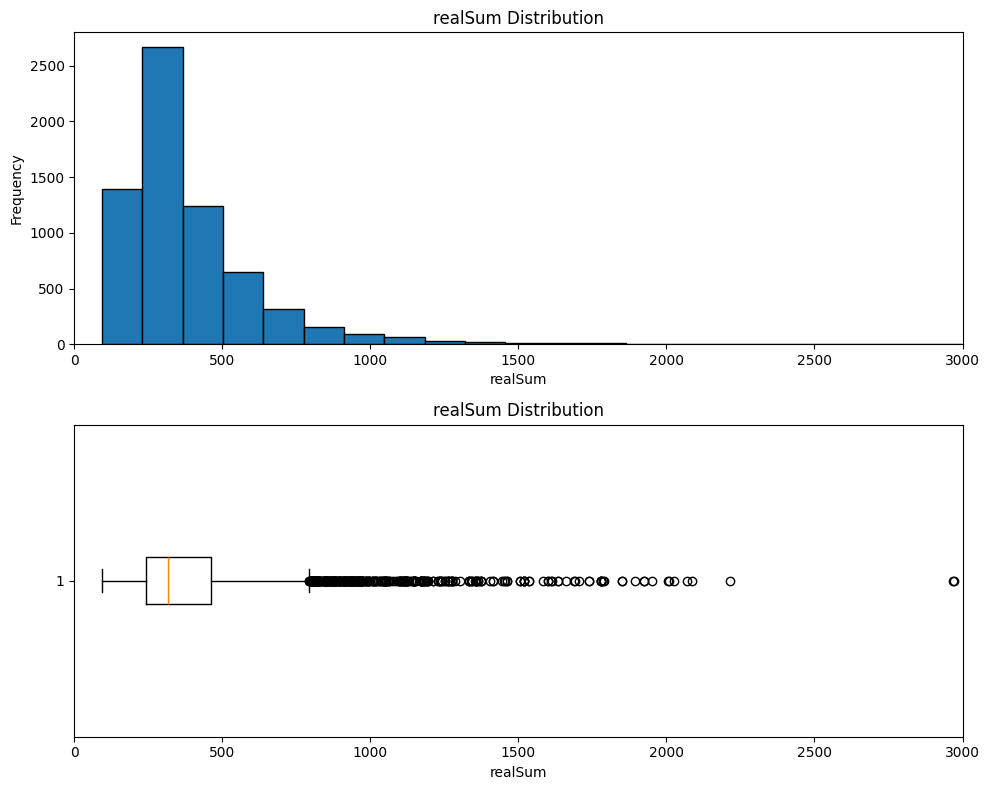

In [14]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.hist(df['realSum'], bins=120, edgecolor='black')  # Tăng bins từ 5 -> 30
plt.title('realSum Distribution')
plt.xlabel('realSum')
plt.ylabel('Frequency')
plt.xlim(0, 3000)

plt.subplot(2, 1, 2)
plt.boxplot(df['realSum'], vert=False)
plt.title('realSum Distribution')
plt.xlabel('realSum')
plt.xlim(0, 3000)

plt.tight_layout()
plt.show()


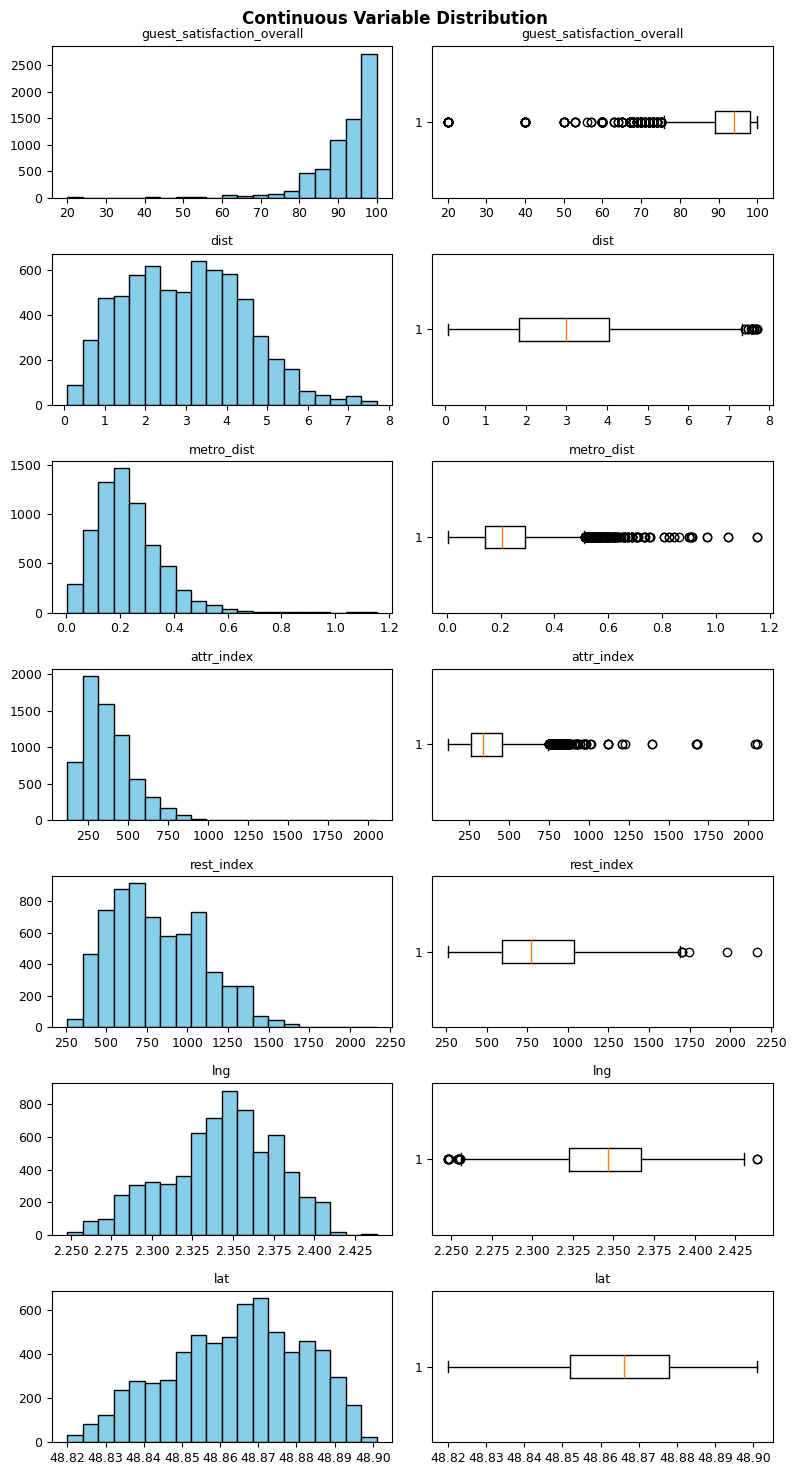

In [15]:
nrows = 7
ncols = 2

continuous_cols_others = [col for col in continuous_cols if col != 'realSum']
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 15))
axes = axes.flatten()


for i, col in enumerate(continuous_cols_others):
    base = i*2

    ax = axes[base]
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col, fontsize= 9)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

    ax = axes[base+1]
    ax.boxplot(df[col], vert=False)
    ax.set_title(col, fontsize= 9)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

fig.suptitle('Continuous Variable Distribution', weight= 'bold')
plt.tight_layout()
plt.show()

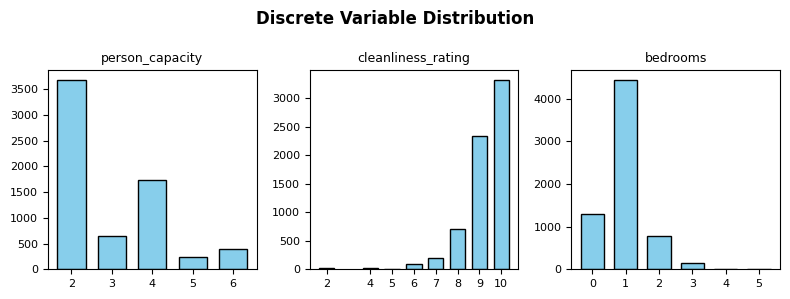

In [16]:
nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(8, 3))
axes = axes.flatten()

for i, col in enumerate(discrete_cols):
    ax = axes[i]
    counts = df[col].value_counts().sort_index()
    ax.bar(counts.index, counts.values, color='skyblue', edgecolor='black', width=0.7)
    ax.set_title(col, fontsize=9)
    
    ax.set_xticks(counts.index)

    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.locator_params(axis='x', nbins=len(counts))

for k in range(len(discrete_cols), len(axes)):
    fig.delaxes(axes[k])
fig.suptitle('Discrete Variable Distribution', weight='bold')
plt.tight_layout()
plt.show()


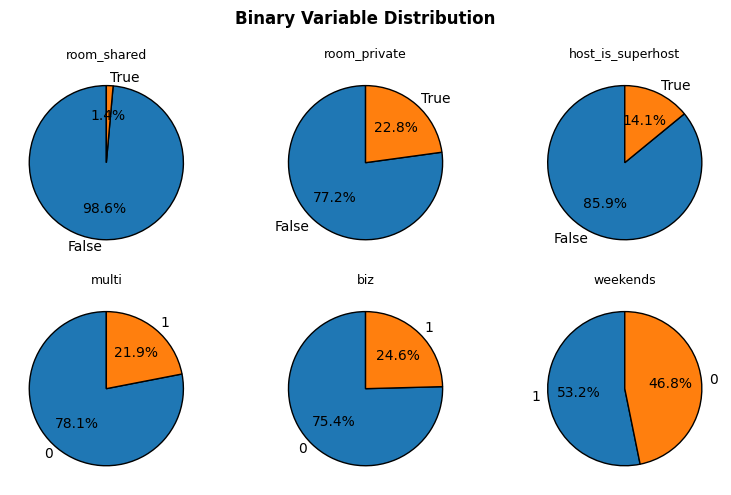

In [17]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(8, 5))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    ax = axes[i]
    freq = df[col].value_counts()
    labels = freq.index.astype(str)
    sizes = freq.values

    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',      
        startangle=90, 
        wedgeprops={'edgecolor': 'black'}
    )
    ax.set_title(col, fontsize=9)


for k in range(len(binary_cols), len(axes)):
    fig.delaxes(axes[k])

fig.suptitle('Binary Variable Distribution', weight='bold')
plt.tight_layout()
plt.show()


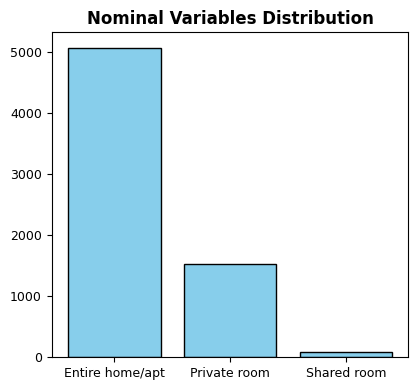

In [18]:
nrows = 1
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))
axes = axes.flatten()


for i, col in enumerate(nominal_cols):
    ax = axes[i]
    freq = df[col].value_counts()
    ax.bar(freq.index.astype(str), freq.values, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

for k in range(len(nominal_cols), len(axes)):
    fig.delaxes(axes[k])

plt.title(f'Nominal Variables Distribution', weight='bold')
plt.tight_layout()
plt.show()

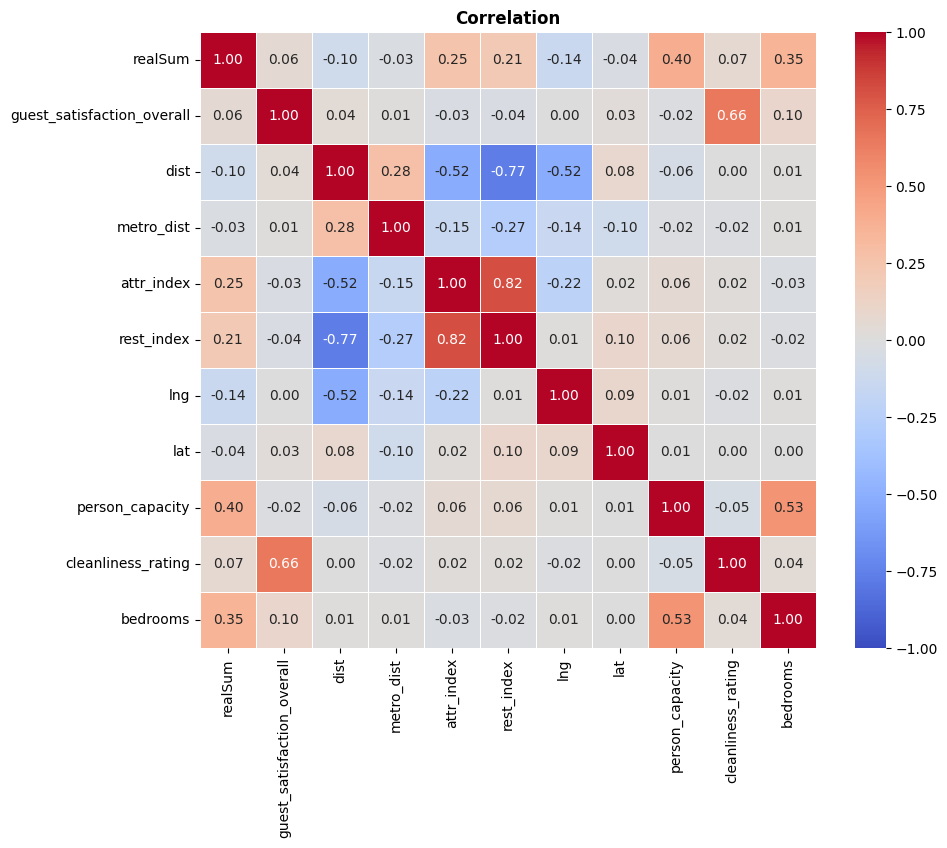

In [20]:
num_cols = continuous_cols + discrete_cols
num_mtrx = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    num_mtrx,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True
)
plt.title('Correlation', weight= 'bold')
plt.show()